<a href="https://colab.research.google.com/github/irbaadika/PCVK_Genap_2023/blob/main/Jobsheet10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Mount to drive

from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Import Library

import cv2
import numpy as np
from matplotlib import pyplot as plt

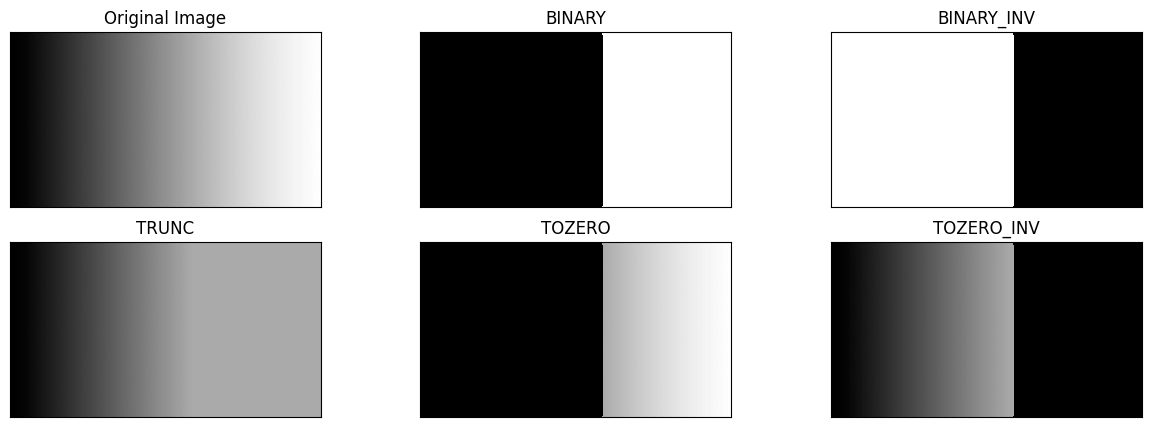

In [ ]:
# Read Image
img_threshold = cv2.imread('/content/drive/MyDrive/ASSETS-PVCK/Images/gradient.jpg')

# Output image
t_binary = img_threshold.copy()
t_binary_inv = img_threshold.copy()
t_trunc = img_threshold.copy()
t_tozero = img_threshold.copy()
t_tozero_inv = img_threshold.copy()
titles = ['Original Image','BINARY','BINARY_INV','TRUNC', 'TOZERO', 'TOZERO_INV']
images = [img_threshold, t_binary, t_binary_inv, t_trunc, t_tozero, t_tozero_inv]

# Thresholding
thresh = 170

def globalthreshold(threshold, img, type):
  for i in range(img_threshold.shape[0]):
    for j in range(img_threshold.shape[1]):
      for c in range(img_threshold.shape[2]):
        # Binary Threshold
        if(type == 1):
          if(img[i,j,c] > threshold):
            img[i,j,c] = 255
          else:
            img[i,j,c] = 0
        # Binary-Inverted Threshold
        elif(type == 2):
          if(img[i,j,c] > threshold):
            img[i,j,c] = 0
          else:
            img[i,j,c] = 255
        # Truncate Threshold
        elif(type == 3):
          if(img[i,j,c] > threshold):
            img[i,j,c] = threshold
          else:
            img[i,j,c] = img[i,j,c]
        # Threshold To Zero
        elif(type == 4):
          if(img[i,j,c] > threshold):
            img[i,j,c] = img[i,j,c]
          else:
            img[i,j,c] = 0
        # Threshold To Zero – Inverted
        elif(type == 5):
          if(img[i,j,c] > threshold):
            img[i,j,c] = 0
          else:
            img[i,j,c] = img[i,j,c]
  return img

# Memanggil fungsi globalThreshold
for gt in range(1, len(images)):
  images[gt] = globalthreshold(thresh, images[gt], gt)

#Membuat figure
plt.figure(figsize = (15,5))
for i in range(len(images)):
  plt.subplot(2,3,i+1),plt.imshow(images[i],'gray', interpolation='nearest')
  plt.title(titles[i])
  plt.xticks([]),plt.yticks([])
plt.show()

<ipython-input-6-3139dab56d58>:19: RuntimeWarning: invalid value encountered in true_divide
  mb = sumb / wb


<Figure size 1500x500 with 0 Axes>

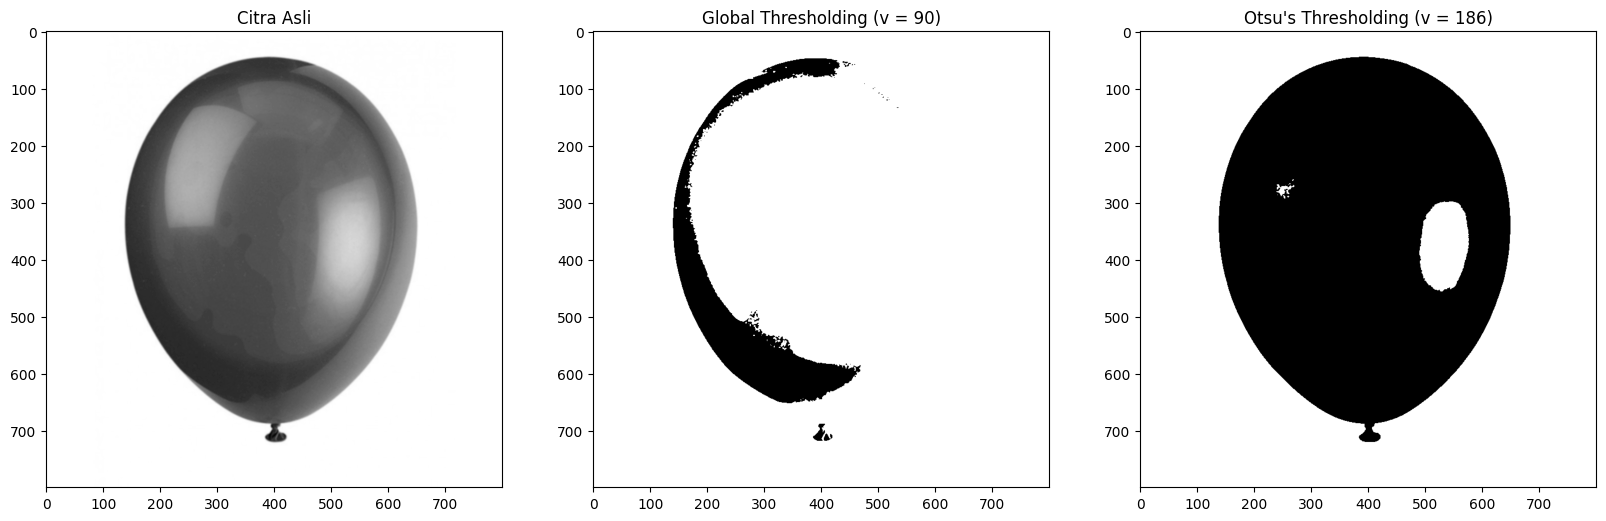

In [6]:
img_ballon = cv2.imread('/content/drive/MyDrive/ASSETS-PVCK/Images/balloon.jpg',0)

# Otsu Thresholding
img_ballon = cv2. GaussianBlur (img_ballon, (5,5),0)

histogram = cv2.calcHist([img_ballon],[0],None,[256], [0,256]) 
normal_histogram = histogram.ravel()/histogram.max() 
Q = normal_histogram.cumsum() 
bins = np.arange (256) 
wb = 0 
sumb = 0 
variationmax = 0 
fn_min = np.inf 
thresh = -1 
for i in range(0,187):
  wb += histogram[i] 
  wf = (img_ballon.shape[0]*img_ballon.shape[1]) - wb 
  sumb += (i*histogram[i]) 
  mb = sumb / wb 
  mf = (sumb - sumb)/wf 
  varbetween = wb * wf * (mb - mf) * (mb - mf) 
  if (varbetween>variationmax):
    variationmax = varbetween
    thresh = i 
x = ("Otsu's Thresholding (v = ")+str(thresh)+")" 
ret, th1 = cv2.threshold(img_ballon, 90, 255, cv2.THRESH_BINARY)
ret, th2 = cv2.threshold (img_ballon, thresh, 255, cv2. THRESH_BINARY)

titles = ['Citra Asli', 'Global Thresholding (v = 90)', x] 
result = [img_ballon, th1, th2]
plt.figure(figsize = (15,5))

plt. figure(figsize = (20,15)) 
for i in range(len(result)):
    plt. subplot(1,3,i+1),plt.imshow(result[i], 'gray') 
    plt.title(titles[i])
plt.show()